In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import operator
from matplotlib import cm
from itertools import cycle, islice
%matplotlib inline


In [3]:
reviews = pd.read_csv('TA_restaurants_curated.csv')


In [80]:
reviews


,Name,City,Cuisine Style,Rating,Price Range,Number of Reviews,Reviews,Price
0,Zahida at Westmarket,Copenhagen,"['Indian', 'Middle Eastern', 'Pakistani', 'Veg...",5.0,$$ - $$$,408.0,"[['Pakistani food from the heart', 'DELICIOUS ...",2.0
1,Restaurant Krebsegaarden,Copenhagen,"['European', 'Scandinavian', 'Danish', 'Norweg...",5.0,$$$$,1071.0,"[['Delightful, Delicious, Warm & Affordable', ...",3.0
2,Grams Laekkerier (closed to 8. jan.),Copenhagen,"['Cafe', 'Fast Food', 'European', 'Soups', 'Da...",5.0,$,550.0,"[['Very friendly and excellent sandwiches!', '...",1.0
3,Pizzeria MaMeMi WestMarket,Copenhagen,"['Italian', 'Pizza', 'Mediterranean', 'Europea...",5.0,$,332.0,"[['Excellent italian pizza', 'Fabulous'], ['01...",1.0
4,The Olive Kitchen & Bar,Copenhagen,"['International', 'European', 'Gluten Free Opt...",5.0,$$ - $$$,1316.0,"[['Great food and good prices!', 'Twice Impres...",2.0
...,...,...,...,...,...,...,...,...
6022,Cafe Wickholm & P,Stockholm,"['Italian', 'Cafe', 'European', 'Swedish']",4.0,$$ - $$$,NaN,NaN,2.0
6023,Hallonbergens kiosk grill & pizzeria AB,Stockholm,['Pizza'],4.0,$,NaN,NaN,1.0
6024,Midan,Stockholm,"['Lebanese', 'Fast Food', 'Mediterranean', 'Ba...",4.0,NaN,NaN,NaN,2.0
6025,Nastan Hemma Cafe och Konditori,Stockholm,['Cafe'],4.0,NaN,NaN,NaN,2.0


In [5]:
reviews.describe()


,Ranking,Rating,Number of Reviews
count,5563.000000,5571.000000,5181.000000
mean,1008.896459,3.921648,86.192820
std,649.534657,0.671763,176.747505
min,1.000000,-1.000000,2.000000
25%,464.000000,3.500000,8.000000
50%,928.000000,4.000000,25.000000
75%,1519.500000,4.500000,83.000000
max,2464.000000,5.000000,3426.000000


In [6]:
reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6027 entries, 0 to 6026
Data columns (total 10 columns):
Name                 6027 non-null object
City                 6027 non-null object
Cuisine Style        4316 non-null object
Ranking              5563 non-null float64
Rating               5571 non-null float64
Price Range          3542 non-null object
Number of Reviews    5181 non-null float64
Reviews              5574 non-null object
URL_TA               6027 non-null object
ID_TA                6027 non-null object
dtypes: float64(3), object(7)
memory usage: 471.0+ KB


In [7]:
reviews.drop([ 'URL_TA', 'ID_TA', 'Ranking'], axis = 1, inplace=True)


In [8]:
reviews.head()


,Name,City,Cuisine Style,Rating,Price Range,Number of Reviews,Reviews
0,Zahida at Westmarket,Copenhagen,"['Indian', 'Middle Eastern', 'Pakistani', 'Veg...",5.0,$$ - $$$,408.0,"[['Pakistani food from the heart', 'DELICIOUS ..."
1,Restaurant Krebsegaarden,Copenhagen,"['European', 'Scandinavian', 'Danish', 'Norweg...",5.0,$$$$,1071.0,"[['Delightful, Delicious, Warm & Affordable', ..."
2,Grams Laekkerier (closed to 8. jan.),Copenhagen,"['Cafe', 'Fast Food', 'European', 'Soups', 'Da...",5.0,$,550.0,"[['Very friendly and excellent sandwiches!', '..."
3,Pizzeria MaMeMi WestMarket,Copenhagen,"['Italian', 'Pizza', 'Mediterranean', 'Europea...",5.0,$,332.0,"[['Excellent italian pizza', 'Fabulous'], ['01..."
4,The Olive Kitchen & Bar,Copenhagen,"['International', 'European', 'Gluten Free Opt...",5.0,$$ - $$$,1316.0,"[['Great food and good prices!', 'Twice Impres..."


In [9]:
reviews.count()


Name                 6027
City                 6027
Cuisine Style        4316
Rating               5571
Price Range          3542
Number of Reviews    5181
Reviews              5574
dtype: int64

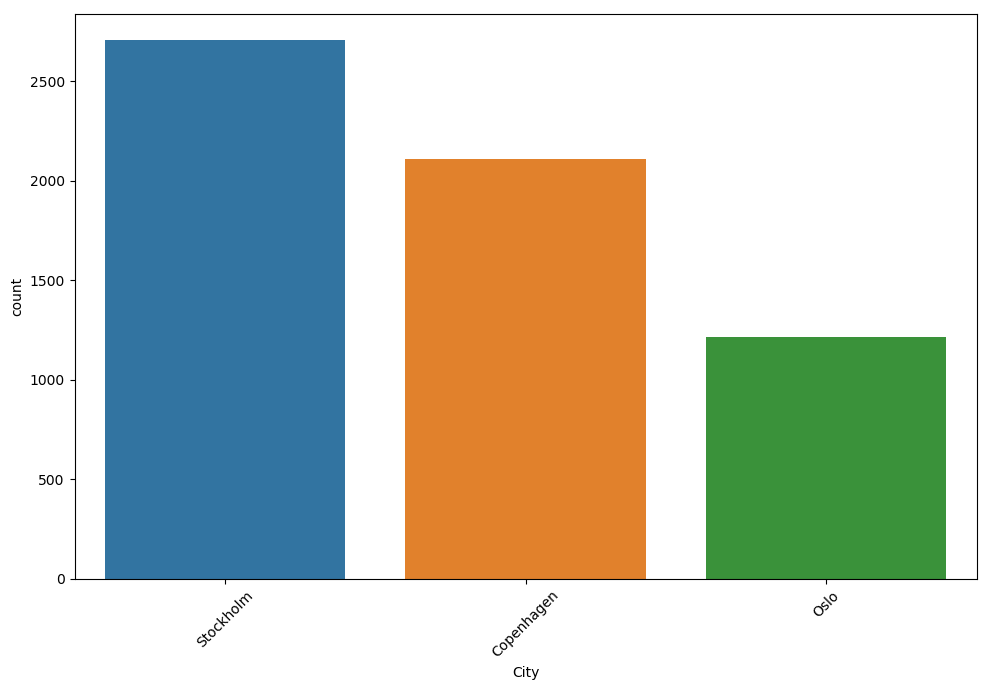

In [10]:
#restaurants per city
plt.figure(figsize=(10,7), dpi =100)
plot = sns.countplot(reviews['City'], order=reviews['City'].value_counts().index)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 45)
plt.tight_layout()

In [11]:
#group by city average rating
byCity = reviews.groupby('City')
byCity['Rating'].mean()

City
Copenhagen    3.994670
Oslo          3.899385
Stockholm     3.873528
Name: Rating, dtype: float64

Text(0, 0.5, 'Average Review Rating')

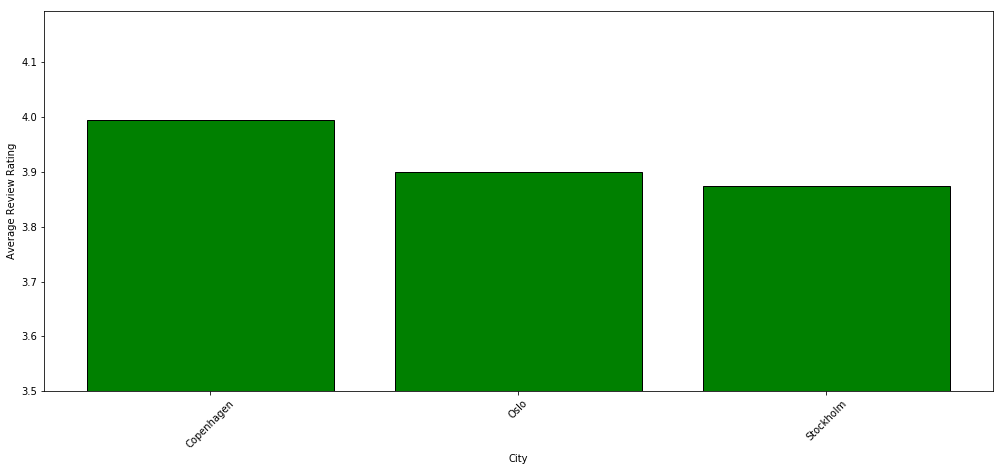

In [14]:
x = list()
y = list()
for city in list(reviews['City'].unique()):
    x.append(city)
    y.append(reviews[reviews['City'] == city]['Rating'].mean())
fig, ax = plt.subplots(1,1,figsize=(17,7))
ax.bar(x,y,color = 'green',edgecolor = 'black')
ax.set_ylim(bottom=3.5)
ax.set_xticklabels(labels = x, rotation = 45)
ax.set_xlabel('City')
ax.set_ylabel('Average Review Rating')

Text(0, 0.5, 'Min Review Rating')

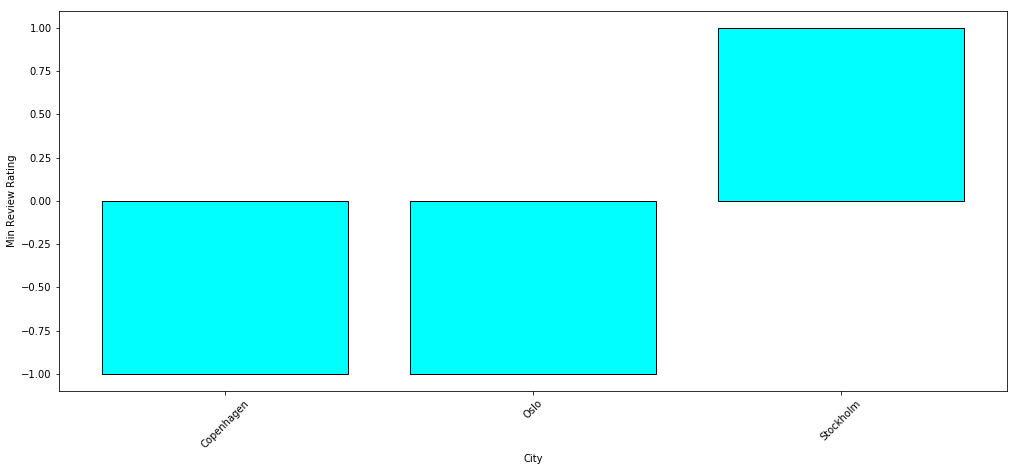

In [15]:
#menimun review rating
x = list()
y = list()
for city in list(reviews['City'].unique()):
    x.append(city)
    y.append(reviews[reviews['City'] == city]['Rating'].min())
fig, ax = plt.subplots(1,1,figsize=(17,7))
ax.bar(x,y,color = 'cyan',edgecolor = 'black')
ax.set_xticklabels(labels = x, rotation = 45)
ax.set_xlabel('City')
ax.set_ylabel('Min Review Rating')

In [16]:
print('Total negative ratings count : ', len(reviews[reviews['Rating'] < 0]))
reviews[reviews['Rating'] < 0]

Total negative ratings count :  4


,Name,City,Cuisine Style,Rating,Price Range,Number of Reviews,Reviews
1963,Kujaku,Copenhagen,['Sushi'],-1.0,NaN,NaN,"[[], []]"
1964,Karma Sushi Kodbyen,Copenhagen,"['Japanese', 'Sushi']",-1.0,$$$$,NaN,"[['Nice atmosphere and friendly staff'], ['01/..."
1967,PS Bar,Copenhagen,"['Cafe', 'Mediterranean', 'European', 'Grill',...",-1.0,NaN,NaN,"[['Such a cool space and tasty food'], ['01/09..."
3245,Peppes Pizza Lambertseter,Oslo,NaN,-1.0,NaN,NaN,"[[], []]"


Text(0, 0.5, 'Count of Negative Ratings')

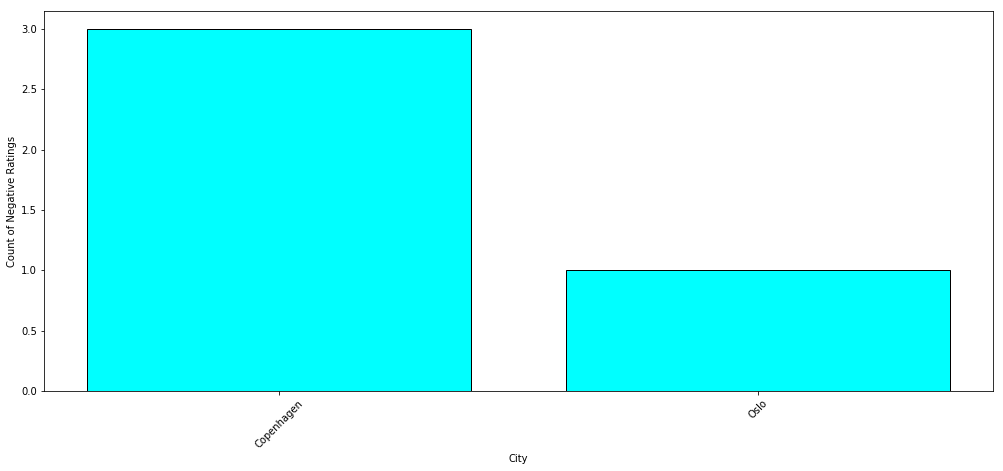

In [17]:
x = list()
y = list()
count = 0
for city in list(reviews['City'].unique()):
    count = len(reviews[(reviews['City'] == city) & (reviews['Rating'] < 0)])
    if count > 0:
        y.append(count)
        x.append(city)
    count = 0
fig, ax = plt.subplots(1,1,figsize=(17,7))
ax.bar(x,y,color = 'cyan',edgecolor = 'black')
ax.set_xticklabels(labels = x, rotation = 45)
ax.set_xlabel('City')
ax.set_ylabel('Count of Negative Ratings')

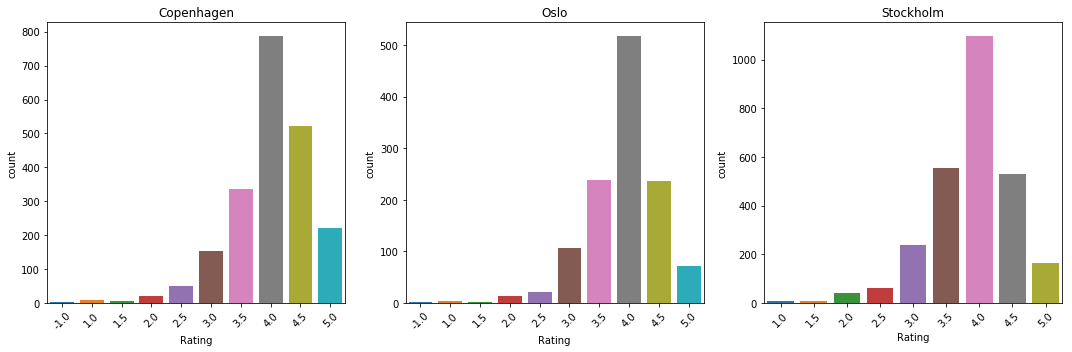

In [66]:
#rating count per city
city = list(reviews['City'].unique())
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
i = 0
ratings = list(reviews['Rating'].unique())
ratingsCount = list()
for c in city:
    reviewsCity = reviews[reviews['City'] == c]
    plot = sns.countplot(x='Rating', data = reviewsCity, ax=axes.flatten()[i])
    plot.set_title(c)
    plot.set_xticklabels(plot.get_xticklabels(), rotation = 45)
    plt.tight_layout()
    i = i + 1    

In [23]:
reviews.head(4)


,Name,City,Cuisine Style,Rating,Price Range,Number of Reviews,Reviews
0,Zahida at Westmarket,Copenhagen,"['Indian', 'Middle Eastern', 'Pakistani', 'Veg...",5.0,$$ - $$$,408.0,"[['Pakistani food from the heart', 'DELICIOUS ..."
1,Restaurant Krebsegaarden,Copenhagen,"['European', 'Scandinavian', 'Danish', 'Norweg...",5.0,$$$$,1071.0,"[['Delightful, Delicious, Warm & Affordable', ..."
2,Grams Laekkerier (closed to 8. jan.),Copenhagen,"['Cafe', 'Fast Food', 'European', 'Soups', 'Da...",5.0,$,550.0,"[['Very friendly and excellent sandwiches!', '..."
3,Pizzeria MaMeMi WestMarket,Copenhagen,"['Italian', 'Pizza', 'Mediterranean', 'Europea...",5.0,$,332.0,"[['Excellent italian pizza', 'Fabulous'], ['01..."


In [24]:
reviews.isna().sum()


Name                    0
City                    0
Cuisine Style        1711
Rating                456
Price Range          2485
Number of Reviews     846
Reviews               453
dtype: int64

In [25]:
reviewsCity.head()


,Name,City,Cuisine Style,Rating,Price Range,Number of Reviews,Reviews
3322,Adam & Albin Matstudio,Stockholm,"['European', 'Swedish', 'Scandinavian', 'Veget...",4.5,$$ - $$$,165.0,"[['Fantastic Dinner', '30th birthday feast'], ..."
3323,Lilla Ego,Stockholm,"['European', 'Swedish', 'Scandinavian', 'Veget...",4.5,$$$$,549.0,"[['Loved the Pork Tartare', 'Excellent'], ['12..."
3324,Operakallaren,Stockholm,"['European', 'Swedish', 'Scandinavian', 'Inter...",4.5,$$$$,359.0,[['Unbelievable Food with an Even Better Expe....
3325,Bar Nombre,Stockholm,"['European', 'Spanish', 'Wine Bar', 'Vegetaria...",4.5,$$ - $$$,496.0,"[['Warm welcome for amazing food', 'Food toget..."
3326,Smorgastarteriet,Stockholm,"['European', 'Contemporary', 'Swedish', 'Scand...",4.5,$$$$,543.0,"[['Brilliant', 'Exellent !'], ['12/21/2017', '..."


In [31]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import matplotlib.cm
from numpy import meshgrid

In [36]:
##### place = list(reviews['City'].unique())
data = {'City': ['Copenhagen', 'Oslo', 'Stockholm'],
        'Lat':  [55.6761, 59.9139, 59.3293],
        'Long': [12.5683, 10.7522, 18.0686]}

dfr = pd.DataFrame(data, columns = ['City', 'Lat', 'Long'])

#print(place)
print(data['City'])

['Copenhagen', 'Oslo', 'Stockholm']


In [37]:
newDf = pd.merge(reviews, dfr, how='left', on='City')
newDf.head()

,Name,City,Cuisine Style,Rating,Price Range,Number of Reviews,Reviews,Lat,Long
0,Zahida at Westmarket,Copenhagen,"['Indian', 'Middle Eastern', 'Pakistani', 'Veg...",5.0,$$ - $$$,408.0,"[['Pakistani food from the heart', 'DELICIOUS ...",55.6761,12.5683
1,Restaurant Krebsegaarden,Copenhagen,"['European', 'Scandinavian', 'Danish', 'Norweg...",5.0,$$$$,1071.0,"[['Delightful, Delicious, Warm & Affordable', ...",55.6761,12.5683
2,Grams Laekkerier (closed to 8. jan.),Copenhagen,"['Cafe', 'Fast Food', 'European', 'Soups', 'Da...",5.0,$,550.0,"[['Very friendly and excellent sandwiches!', '...",55.6761,12.5683
3,Pizzeria MaMeMi WestMarket,Copenhagen,"['Italian', 'Pizza', 'Mediterranean', 'Europea...",5.0,$,332.0,"[['Excellent italian pizza', 'Fabulous'], ['01...",55.6761,12.5683
4,The Olive Kitchen & Bar,Copenhagen,"['International', 'European', 'Gluten Free Opt...",5.0,$$ - $$$,1316.0,"[['Great food and good prices!', 'Twice Impres...",55.6761,12.5683


In [43]:
byCity = reviews.groupby('City')
byCity['Rating'].mean()

City
Copenhagen    3.994670
Oslo          3.899385
Stockholm     3.873528
Name: Rating, dtype: float64

In [44]:
reviews[reviews['City'] == 'Stockholm']['Rating'].isna().sum()


242

In [45]:
reviews['Rating'].fillna(value = 4.0, inplace = True)
reviews['Rating'].isna().sum()

0

In [46]:
byCity = reviews.groupby('City')
byCity['Rating'].mean()

City
Copenhagen    3.995021
Oslo          3.905606
Stockholm     3.884843
Name: Rating, dtype: float64

In [49]:
for city in list(reviews['City'].unique()):
    print(city, reviews[reviews['City'] == city]['Price Range'].isna().sum())

Copenhagen 761
Oslo 434
Stockholm 1290


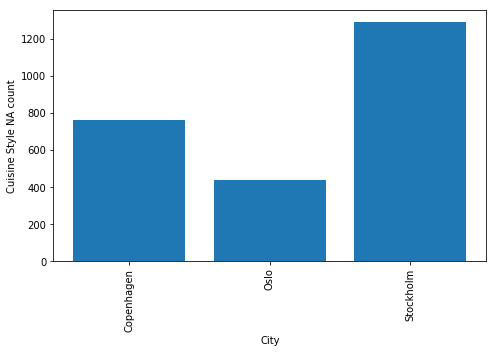

In [50]:
fig, axes = plt.subplots(1,1, figsize=(7,5))
y_ax = list()
x_ax = list(reviews['City'].unique())
for city in list(reviews['City'].unique()):
    na = reviews[reviews['City'] == city]['Price Range'].isna().sum()
    y_ax.append(na)  
axes.bar(x_ax, y_ax)
axes.set_xticklabels(x_ax, rotation = 90)
axes.set_ylabel('{} NA count'.format(col))
axes.set_xlabel('City')
plt.tight_layout()

In [51]:
reviews['Price Range'].unique()

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

In [52]:
reviews['City'].count()

6027

In [53]:

for i in range(0, reviews['City'].count()):
    if reviews.loc[i,'Price Range'] == '$':
        reviews.loc[i,'Price'] = 1
    elif reviews.loc[i,'Price Range'] == "$$ - $$$":
        reviews.loc[i,'Price'] = 2
    elif reviews.loc[i,'Price Range'] == '$$$$':
        reviews.loc[i,'Price'] = 3
reviews['Price'][np.isnan(reviews['Price'])] = 0

/Users/maxrojas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


4
[2. 3. 1. 0.]


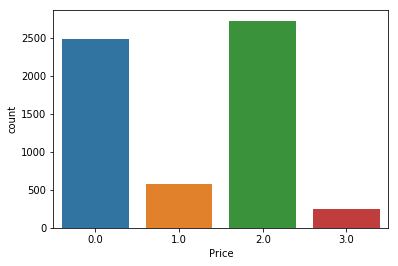

In [54]:
print(reviews['Price'].nunique())
print(reviews['Price'].unique())
sns.countplot(x='Price', data=reviews)

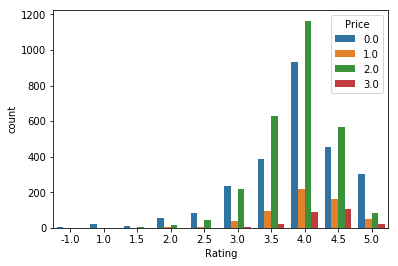

In [55]:
sns.countplot(x='Rating', data = reviews, hue = 'Price')


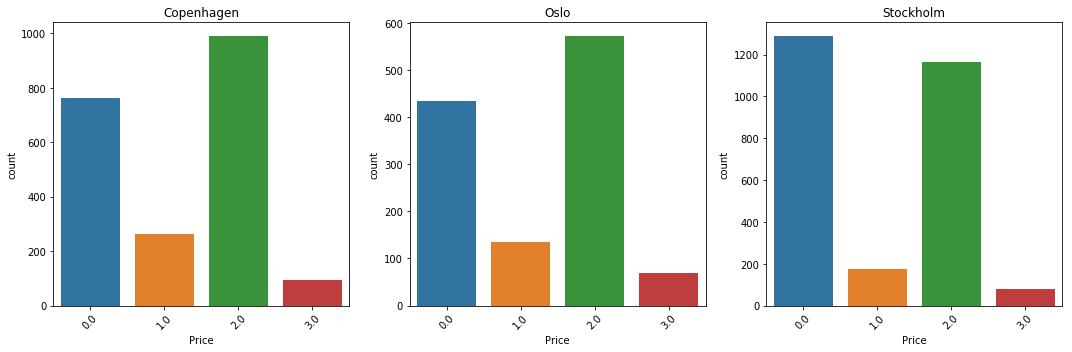

In [65]:
city = list(reviews['City'].unique())
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
i = 0
ratings = list(reviews['Rating'].unique())
ratingsCount = list()
for c in city:
    reviewsCity = reviews[reviews['City'] == c]
    plot = sns.countplot(x='Price', data = reviewsCity, ax=axes.flatten()[i])
    plot.set_title(c)
    plot.set_xticklabels(plot.get_xticklabels(), rotation = 45)
    plt.tight_layout()
    i = i + 1 

In [67]:
for i in range(0, reviews['City'].count()):
    if reviews.loc[i,'Price'] == 0:
        reviews.loc[i,'Price'] = 2

3
[2. 3. 1.]


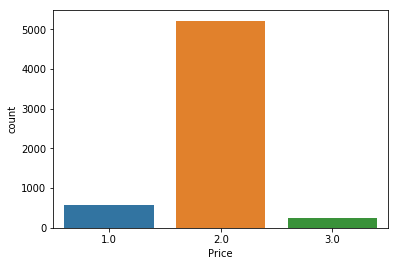

In [68]:
print(reviews['Price'].nunique())
print(reviews['Price'].unique())
sns.countplot(x='Price', data=reviews)

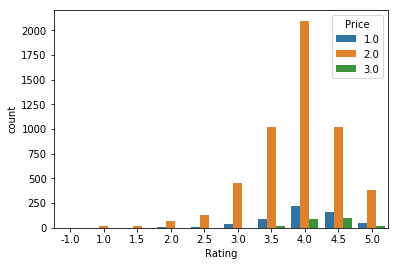

In [69]:
sns.countplot(x='Rating', data = reviews, hue = 'Price')


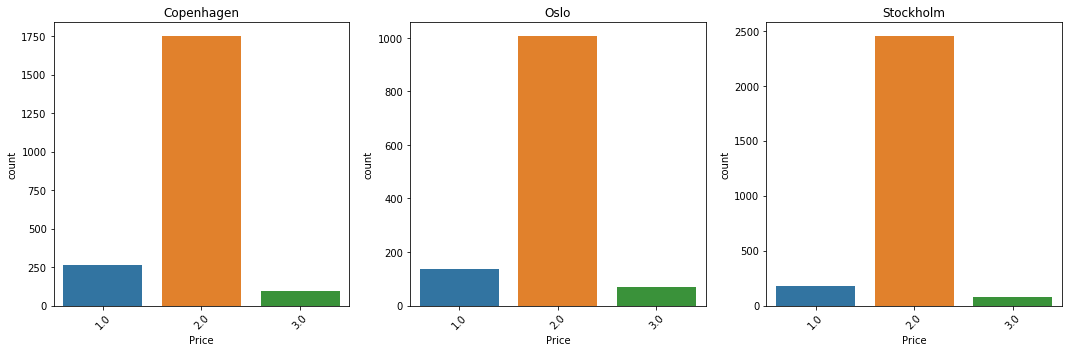

In [71]:
city = list(reviews['City'].unique())
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
i = 0
ratings = list(reviews['Rating'].unique())
ratingsCount = list()
for c in city:
    reviewsCity = reviews[reviews['City'] == c]
    plot = sns.countplot(x='Price', data = reviewsCity, ax=axes.flatten()[i])
    plot.set_title(c)
    plot.set_xticklabels(plot.get_xticklabels(), rotation = 45)
    plt.tight_layout()
    i = i + 1  

In [72]:
#cuisine
def cuisine_count(_list):
    cuisine_dict = {'UnknownCuisine': 0}
    for cuisines in _list:
        if cuisines is not np.nan:
            cuisines = ast.literal_eval(cuisines)  
            for cuisine in cuisines:  
                if cuisine in cuisine_dict:
                    cuisine_dict[cuisine] += 1
                else :
                    cuisine_dict[cuisine] = 1
        else:
            cuisine_dict['UnknownCuisine'] +=1
    #print(cuisines)
    return(cuisine_dict)

In [73]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d}".format(absolute)
def plotCuisine(cui,count,type = 'bar',city=""):
    if type == 'bar':
        fig, axes = plt.subplots(1,1, figsize = (20,20))
    elif type == 'pie':    
        fig, axes = plt.subplots(1,1, figsize = (7,7))
    lists = sorted(cui.items(), key=operator.itemgetter(1),reverse=True)
    x, y = zip(*lists[:count])
    col = cm.inferno_r(np.linspace(.7,.2, len(x)))
    if type == 'bar':
        axes.bar(x,y,color = col)
        axes.set_ylabel('Count')
        axes.set_xlabel('Cuisine')
        axes.set_xticklabels(x,rotation = 90)
    elif type == 'pie':
        axes.pie(y, labels = x, autopct=lambda pct: func(pct, y))
        axes.set_title(city,fontsize=15)
    axes.set_facecolor('lightgrey')

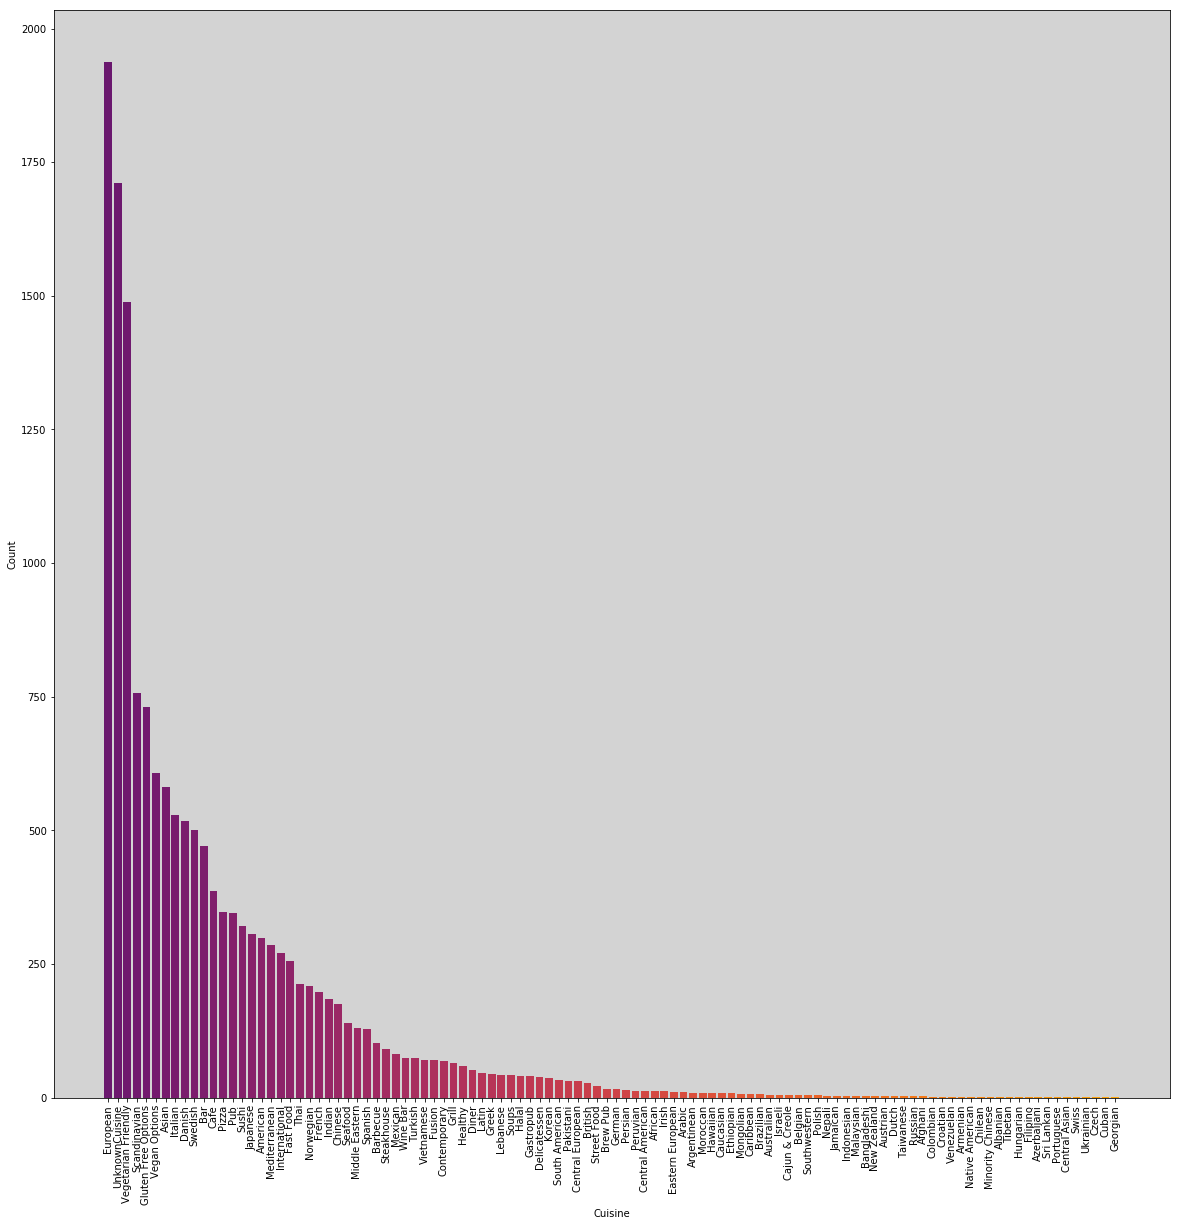

In [74]:
cui = cuisine_count(reviews['Cuisine Style'])
plotCuisine(cui, len(cui))

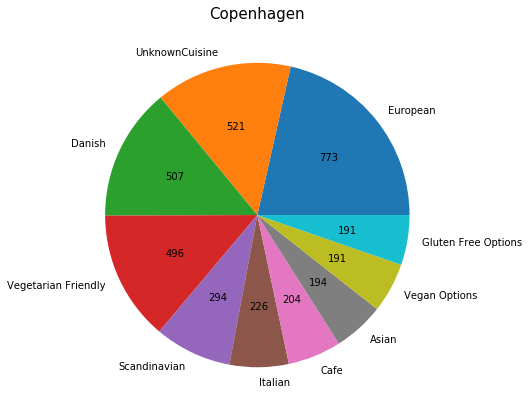

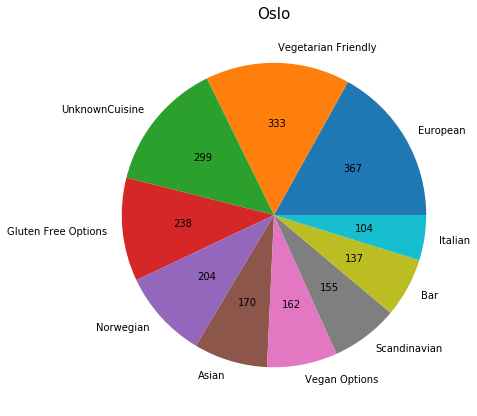

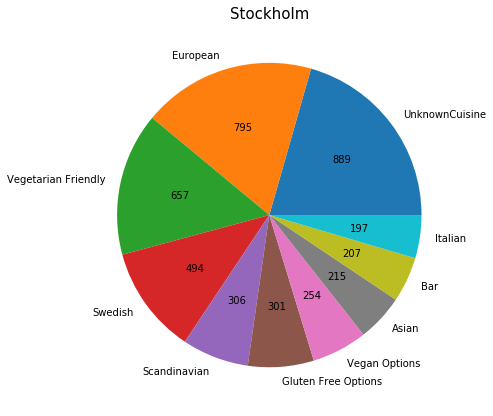

In [75]:
for city in list(reviews['City'].unique()):
    cui = cuisine_count(reviews[reviews['City'] == city]['Cuisine Style'])
    plotCuisine(cui,10,'pie',city)

In [76]:
reviews['Number of Reviews'].isna().sum()


846

Text(0, 0.5, 'Average Review Rating')

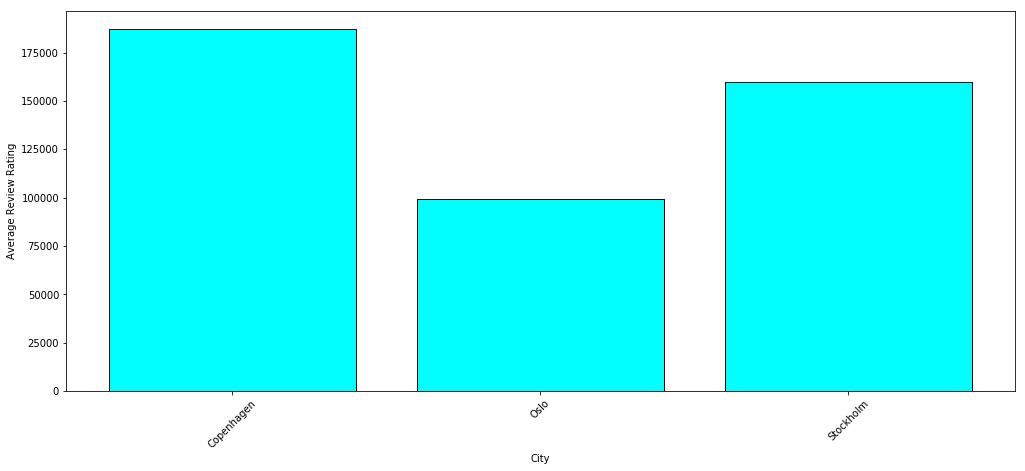

In [77]:
#reviews vs city
x = list()
y = list()
for city in list(reviews['City'].unique()):
    x.append(city)
    y.append(reviews[reviews['City'] == city]['Number of Reviews'].sum())
fig, ax = plt.subplots(1,1,figsize=(17,7))
ax.bar(x,y,color = 'cyan',edgecolor = 'black')
ax.set_ylim(bottom=3.5)
ax.set_xticklabels(labels = x, rotation = 45)
ax.set_xlabel('City')
ax.set_ylabel('Average Review Rating')

In [79]:
#restaurants with more reviews per city
for city in list(reviews['City'].unique()):
    print('----------',city,'----------', '\n',reviews[(reviews['City'] == city) & (reviews['Rating'] > 4.0)].sort_values(by = 'Number of Reviews', axis = 0, ascending = False)[['Name', 'Number of Reviews']].head())
    print("\n")

---------- Copenhagen ---------- 
                        Name  Number of Reviews
33   Copenhagen Street Food             3426.0
27                    Tight             2492.0
30                     Host             1562.0
11                     Noma             1464.0
4   The Olive Kitchen & Bar             1316.0


---------- Oslo ---------- 
                              Name  Number of Reviews
2112  Ruffino Ristorante Italiano             1696.0
2131      Dinner Bar & Restaurant             1391.0
2126                  Mamma Pizza             1265.0
2111                     hos Thea             1062.0
2130             Elias Mat & Sant              967.0


---------- Stockholm ---------- 
                      Name  Number of Reviews
3329  Stockholms Gastabud             1784.0
3353          Fem Sma Hus             1452.0
3343   Restaurang Kryp In             1382.0
3342            Tradition             1276.0
3335     Aifur Krog & Bar             1162.0


